In [49]:
from numpy.random import poisson as Poiss, exponential as Exp, geometric as Geom, uniform as U
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_continuous
from mpmath import invertlaplace, exp, nstr

In [50]:
def U_t(T, u0, c, lambd):
    N = Poiss(lambd*T)
    moments = np.array([U(0, T) for i in range(N)])
    x = np.linspace(0, T, T*20)
    x = np.append(x, moments)
    x.sort()
    u = np.array([u0 + c*t for t in x])
    for i in range(N):
        X = max(Exp(0.25), 0.5)
        u[np.where(x==moments[i])[0][0]:] -= X       
    return u, x

In [57]:
def rude_failure_estimate(N, T, u0, c, lambd):
    m = 0
    for i in range(N):
        u = U_t(T, u0, c, lambd)[0]
        if np.any(u < 0):
            m += 1
    return m/N

In [52]:
def show(u0, c, lambd):
    fid, ax = plt.subplots()
    for i in range(5):
        u, x = U_t(10, u0, c, lambd)
        ax.plot(x, u)
    plt.show()

In [53]:
class F_hat(rv_continuous):
    def _cdf(self, x):
        return x/mu if x < 0.5 else (2 + np.exp(-2)-np.exp(-4*x))/(4*mu)

In [54]:
def accurate_failure_estimate(N, u0, c, lambd):
    m = 0
    for j in range(N):
        G = Geom(1-lambd*mu/c)-1
        s = 0
        for i in range(G):
            s += F_hat().rvs()
        if s > u0:
            m += 1
    return m/N

In [55]:
def main():
    u0 = [1, 10]
    lambd = [1, 5]
    c = [1+0.5*np.exp(-2), 2.625+1.3125*np.exp(-2)]
    global mu
    mu = 0.5 + 0.25*np.exp(-2)
    f = lambda p, c, l, m: (c-l*m)/p/(c-l*((1-exp(-0.5*p))/p + exp(-0.5*(p+4.))/(p+4))) 
    
    for i in range(len(u0)):
        fp = lambda p: f(p, c[i], lambd[i], mu)
        show(u0[i], c[i], lambd[i])
        print('Monte-Karlo methods')
        print('Rude failure estimate: ', rude_failure_estimate(1000, 1000, u0[i], c[i], lambd[i]))
        print('More accurate failure estimate: ', accurate_failure_estimate(1000, u0[i], c[i], lambd[i]))
        print('\nFailure estimate using inverse Laplace transform: ', nstr(1 - invertlaplace(fp, u0[i]), 4))

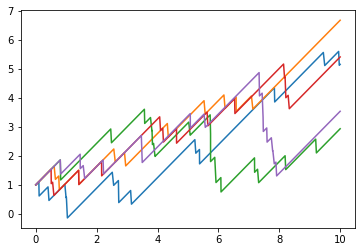

Monte-Karlo methods
Rude failure estimate:  0.063
More accurate failure estimate:  0.078

Failure estimate using inverse Laplace transform:  0.07353


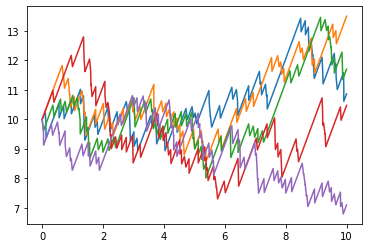

Monte-Karlo methods
Rude failure estimate:  0.174
More accurate failure estimate:  0.185

Failure estimate using inverse Laplace transform:  0.1741


In [59]:
main()